## SyllableGenerator( input ) :  class
* **input**:  directory path containing the *.wav file

In [1]:
from syllable_generator import *
sg = SyllableGenerator('../0-Data/org/')

### SyllableGenerator.wav_list()
* You can get a list of wav file in the directory

In [2]:
wav_list = sg.wav_list
print('* Total wav files : ', len(wav_list))
print(wav_list)

* Total wav files :  23
['../0-Data/org/w58y67_20200416_082440_615.wav', '../0-Data/org/w58y67_20200416_095713_130.wav', '../0-Data/org/w58y67_20200416_102254_472.wav', '../0-Data/org/w58y67_20200416_125743_900.wav', '../0-Data/org/w58y67_20200417_134345_534.wav', '../0-Data/org/w58y67_20200417_140827_964.wav', '../0-Data/org/w58y67_20200418_081137_347.wav', '../0-Data/org/w58y67_20200418_103142_469.wav', '../0-Data/org/w58y67_20200419_092649_213.wav', '../0-Data/org/w58y67_20200419_103444_397.wav', '../0-Data/org/w58y67_20200419_104314_638.wav', '../0-Data/org/w58y67_20200419_121107_415.wav', '../0-Data/org/w58y67_20200419_121111_487.wav', '../0-Data/org/w58y67_20200421_141116_783.wav', '../0-Data/org/w58y67_20200423_143202_195.wav', '../0-Data/org/w58y67_20200425_132356_178.wav', '../0-Data/org/w58y67_20200425_175319_919.wav', '../0-Data/org/w58y67_20200425_200544_711.wav', '../0-Data/org/w58y67_20200428_114129_585.wav', '../0-Data/org/w58y67_20200428_120636_436.wav', '../0-Data/org/

### DC.get_syllable_list( **input** )
* **input** : wav_list (from DC.wav_list)
* **output** : information of syllables. (shape: [N, 3] )
* 508 syllables were generated from the our 23 wav files.

In [3]:
syllable_list = sg.get_syllable_list(wav_list)
print('* Output shape: ', syllable_list.shape)
print(syllable_list[0])

* Finish Idx 0 wav file :  w58y67_20200416_082440_615
* Finish Idx 10 wav file :  w58y67_20200419_104314_638
* Finish Idx 20 wav file :  w58y67_20200503_174608_047
* Output shape:  (508, 3)
[   0  281 1308]


### Check information of syllable_list

In [4]:
print('wavIdx StartPoint Lenth')
print(syllable_list)

syllable_wavidx = syllable_list[:,0]
syllable_start = syllable_list[:,1]
syllable_lenth = syllable_list[:,2]

wavIdx StartPoint Lenth
[[    0   281  1308]
 [    0  4642  2007]
 [    0  9089  1655]
 ...
 [   22 48005  2667]
 [   22 53067  2727]
 [   22 57958  2520]]


## draw_tools

In [5]:
from draw_tools import *

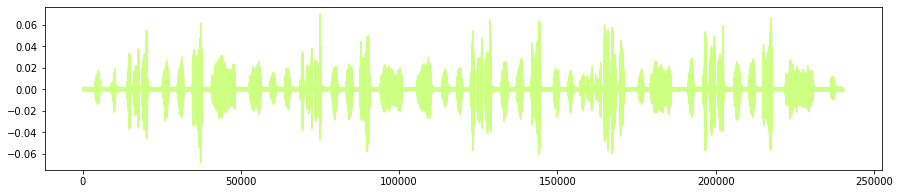

In [6]:
draw_wav(wav_list[2])

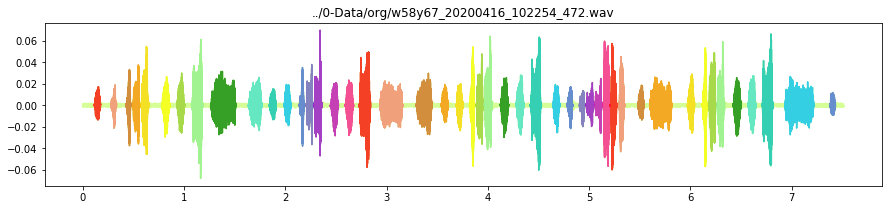

In [7]:
draw_split_wav(wav_list, syllable_list, 2)

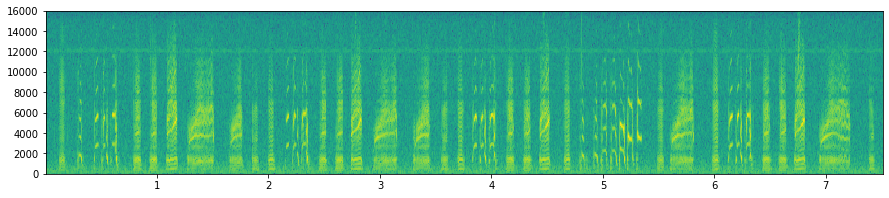

In [8]:
draw_spectrogram(wav_list[2])

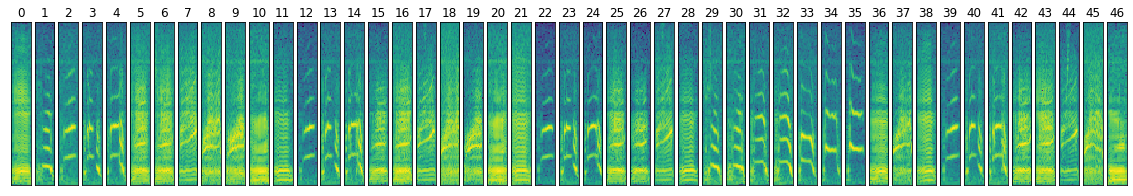

In [9]:
draw_split_spectrogram(wav_list, syllable_list, 2)

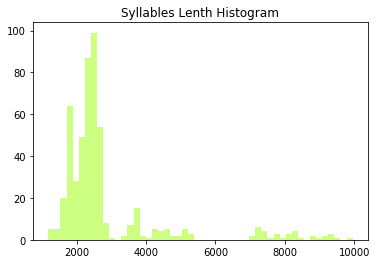

In [10]:
hist_syllable_lenth(syllable_lenth)

## FindAbnormal( input1, input 2 ): class
* **input1** : wav_list
* **input2** : syllable_list

In [12]:
from find_abnormal import *
fa=FindAbnormal(wav_list, syllable_list)

### fa.get_overlen( input )
* **input** : syllable lenth limit (in here, 8000)
* Find abnormal process is a mehtod of finding an abnormally long syllable when using a sylable split.
* Set the appropriate limit based on the lenth histogram drawn above

In [13]:
overlen_list = fa.get_overlen(8000)
overlen_list=np.sort(list(set(overlen_list)))
overlen_list

array([ 0,  2,  3,  7,  8,  9, 11, 12, 13, 14, 20, 21])

### fa.save_abnormal_img( input1, input2 )
* **input1** : Syllable wav id list (in here, **overlen_list** obtained earlier)
* **input2** : Save path

In [16]:
save_path = './test_results'
fa.save_abnormal_img(overlen_list, save_path)

* wav files that have over lenth images were saved at save path. You have to check images, and make list of real abnormal file

In [14]:
abnormal_list=[]

### fa.remove_abnormal_img(input1, input2)
* **input1**: abnormal_list
* **input2**: lenth limit
* Now we remove abnormal wav list at our syllable_list
* We can also remove lenth limit. if you don't want lenth limit, set large number. (**hist_syllable_lenth** will help to set lenth limit)

In [15]:
final_syllable_list= fa.remove_abnormal(abnormal_list, lenth_limit=8000)
syllable_list.shape, final_syllable_list.shape

((508, 3), (490, 3))

## DataProcess ( input1 , input 2 ) : class
* **input1** : wav_list
* **input2** : syllable_list

In [16]:
from data_process import *
dp = DataProcess(wav_list, final_syllable_list, width=64, height=128)

### dp.get_dataset( )
* convert syllables to spectrogram image(width=64, height=128)

In [17]:
valset, imgset = dp.get_dataset()

* Start process...  total syllables: 490
0
100
200
300
400


In [18]:
final_syllable_list.shape, valset.shape, imgset.shape

((490, 3), (490,), (490, 128, 64))

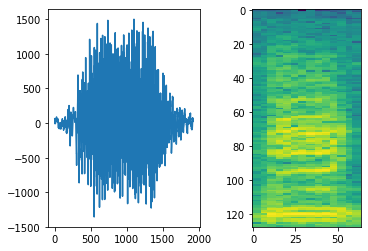

In [30]:
idx = 6
plt.subplot(1,2,1)
plt.plot(valset[idx])
plt.subplot(1,2,2)
plt.imshow(imgset[idx])
plt.show()

In [34]:
save_path = '../0-Data/test/'
np.save("%s/label"%save_path, final_syllable_list)
np.save("%s/imgset"%save_path, imgset)
np.save("%s/valset"%save_path, valset)